### Forecast de demanda: Facturapp

### ✅ Prophet

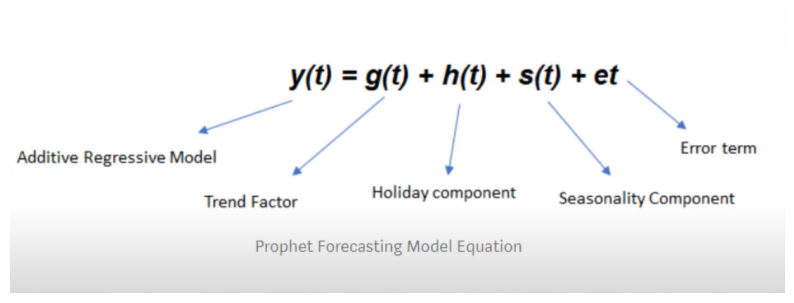

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Cargar la imagen
img = mpimg.imread('C:/Others/Emprendiendo/Agencia/Bummi ai/GitHub Bummi/forecast_facturapp/04_Prophet/Prophet forecasting model equation.PNG')

# Mostrar la imagen
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')  # Para ocultar los ejes
plt.show()


##### Datos

In [1]:
import warnings
warnings.simplefilter("ignore")
warnings.simplefilter("ignore", DeprecationWarning)
warnings.simplefilter("ignore", FutureWarning)

In [2]:
import pandas as pd

# Rutas a los archivos CSV
clientes_path = 'C:/Others/Emprendiendo/Agencia/Bummi ai/GitHub Bummi/forecast_facturapp/csv/clientes.csv'
productos_path = 'C:/Others/Emprendiendo/Agencia/Bummi ai/GitHub Bummi/forecast_facturapp/csv/productos.csv'
ventas_path = 'C:/Others/Emprendiendo/Agencia/Bummi ai/GitHub Bummi/forecast_facturapp/csv/ventas.csv'

# Leer los archivos CSV
clientes_df = pd.read_csv(clientes_path)
productos_df = pd.read_csv(productos_path)
ventas_df = pd.read_csv(ventas_path)

El top 20 productos representan el 48.02% de las ventas totales.


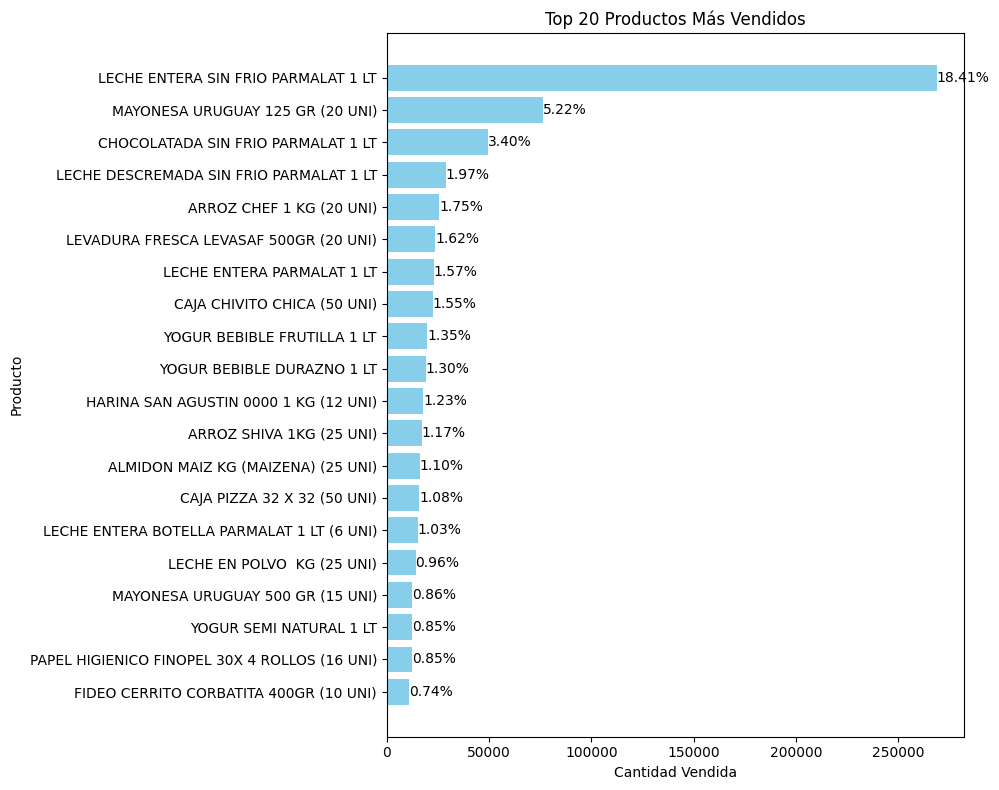

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Suponiendo que 'ventas_df' es tu DataFrame original y 'productos_df' contiene las descripciones
ventas_totales = ventas_df.groupby('codigo_producto')['cantidad_ventas_producto'].sum().reset_index()

# Agregar el nombre del producto desde productos_df
ventas_totales = ventas_totales.merge(productos_df[['codigo_producto', 'descripcion_producto']], on='codigo_producto')

# Ordenar el DataFrame por la cantidad total vendida en orden descendente
ventas_totales = ventas_totales.sort_values(by='cantidad_ventas_producto', ascending=False)

# Calcular el total de ventas para calcular el porcentaje
total_ventas = ventas_totales['cantidad_ventas_producto'].sum()

# Filtrar los primeros 20 productos más vendidos
top_n_productos = ventas_totales.head(20)

# Calcular el porcentaje que cada producto representa sobre el total de ventas
top_n_productos['porcentaje'] = (top_n_productos['cantidad_ventas_producto'] / total_ventas) * 100

# Calcular el porcentaje total representado por el top 20 de productos
porcentaje_total_top_20 = top_n_productos['porcentaje'].sum()

# Mostrar el resultado
print(f"El top 20 productos representan el {porcentaje_total_top_20:.2f}% de las ventas totales.")

# Crear un gráfico de barras horizontal
plt.figure(figsize=(10, 8))
bars = plt.barh(top_n_productos['descripcion_producto'], top_n_productos['cantidad_ventas_producto'], color='skyblue')

# Invertir el eje Y para que el producto más vendido esté en la parte superior
plt.gca().invert_yaxis()

# Agregar los porcentajes como etiquetas en el gráfico
for bar, porcentaje in zip(bars, top_n_productos['porcentaje']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{porcentaje:.2f}%', 
             va='center', ha='left')

# Agregar títulos y etiquetas
plt.title('Top 20 Productos Más Vendidos')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Producto')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [22]:
import pandas as pd

# Sumar las ventas por producto
ventas_totales = ventas_df.groupby('codigo_producto')['cantidad_ventas_producto'].sum().reset_index()

# Ordenar por la cantidad total vendida en orden descendente
ventas_totales = ventas_totales.sort_values(by='cantidad_ventas_producto', ascending=False)

# Seleccionar el top 20 de productos más vendidos
top_20_productos = ventas_totales.head(20)

# Si quieres agregar el nombre del producto del DataFrame 'productos'
top_20_productos = top_20_productos.merge(productos_df[['codigo_producto', 'descripcion_producto']], on='codigo_producto')

# Mostrar los resultados
top_20_productos

,codigo_producto,cantidad_ventas_producto,descripcion_producto
0,108681,268839.000,LECHE ENTERA SIN FRIO PARMALAT 1 LT
1,1238,76243.000,MAYONESA URUGUAY 125 GR (20 UNI)
2,108687,49591.000,CHOCOLATADA SIN FRIO PARMALAT 1 LT
3,108682,28726.000,LECHE DESCREMADA SIN FRIO PARMALAT 1 LT
4,123,25556.000,ARROZ CHEF 1 KG (20 UNI)
5,6018,23657.000,LEVADURA FRESCA LEVASAF 500GR (20 UNI)
6,108604,22875.000,LECHE ENTERA PARMALAT 1 LT
7,5576,22569.000,CAJA CHIVITO CHICA (50 UNI)
8,250,19743.000,YOGUR BEBIBLE FRUTILLA 1 LT
9,251,18975.000,YOGUR BEBIBLE DURAZNO 1 LT


In [23]:
# Lista de códigos de producto que quieres filtrar
codigos_producto = ['108681', '1238', '108687', '108682', '123', '6018', '108604', '5576', '250', '251', 
                   '6217', '2004', '9142', '0179', '450025', '108637', '64550', '248', '5673', '5993']

# Filtrar el DataFrame original para que solo incluya las filas con los códigos de producto especificados
ventas_filtradas_df = ventas_df[ventas_df['codigo_producto'].isin(codigos_producto)]

# Crear la tabla agregada con los datos filtrados
tabla_agrupada = ventas_filtradas_df.groupby('fecha_venta').agg(
    cantidad_ventas_producto=pd.NamedAgg(column='cantidad_ventas_producto', aggfunc='sum')
).reset_index()

# Pivotear las ventas de cada código de producto
ventas_por_producto = ventas_filtradas_df.pivot_table(index='fecha_venta', columns='codigo_producto', values='cantidad_ventas_producto', aggfunc='sum', fill_value=0)

# Renombrar las columnas con un prefijo para que coincida con tu formato
ventas_por_producto.columns = [f'codigo_producto_{col}' for col in ventas_por_producto.columns]

# Unir las tablas
df_prophet = pd.merge(tabla_agrupada, ventas_por_producto, on='fecha_venta', how='left')

df_prophet = df_prophet[['fecha_venta', 'cantidad_ventas_producto']]

# Renombramos variables para que prophet tome como input
df_prophet = df_prophet.rename(columns={'fecha_venta': 'ds', 'cantidad_ventas_producto': 'y'})
df_prophet.head()

,ds,y
0,2022-04-16,18.0
1,2022-04-17,87.0
2,2022-04-18,1361.0
3,2022-04-19,761.0
4,2022-04-20,606.0


In [24]:
# Calcular el promedio, máximo, mínimo y moda de la columna 'y'
promedio_y = df_prophet['y'].mean()
maximo_y = df_prophet['y'].max()
minimo_y = df_prophet['y'].min()
moda_y = df_prophet['y'].mode()[0]  # [0] para tomar el primer valor si hay múltiples modas

# Mostrar los resultados
print("Promedio de 'y':", promedio_y)
print("Máximo de 'y':", maximo_y)
print("Mínimo de 'y':", minimo_y)
print("Moda de 'y':", moda_y)

Promedio de 'y': 1056.0646280120482
Máximo de 'y': 3242.0
Mínimo de 'y': 1.0
Moda de 'y': 6.0


##### Para modelar vacaciones y eventos especiales con selección manual

In [ ]:
#playoffs = pd.DataFrame({
#  'holiday': 'playoff',
#  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
#                        '2010-01-24', '2010-02-07', '2011-01-08',
#                        '2013-01-12', '2014-01-12', '2014-01-19',
#                        '2014-02-02', '2015-01-11', '2016-01-17',
#                        '2016-01-24', '2016-02-07']),
#  'lower_window': 0,
#  'upper_window': 1,
#})
#superbowls = pd.DataFrame({
#  'holiday': 'superbowl',
#  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
#  'lower_window': 0,
#  'upper_window': 1,
#})
#holidays = pd.concat((playoffs, superbowls))

In [ ]:
# Para ver qué días festivos se incluyen
# m.train_holiday_names

##### Train Model

In [25]:
from prophet import Prophet

m = Prophet(
    growth='linear',  # Define el tipo de tendencia de crecimiento. "linear" (predeterminado) o "logistic".

    changepoints=None,  # Lista de fechas donde se espera que la tendencia cambie. None para detección automática.
    
    n_changepoints=25,  # Número de puntos de cambio a ser detectados automáticamente. El valor predeterminado es 25.
    
    changepoint_range=0.8,  # Proporción del historial en el que se detectan los puntos de cambio. El valor predeterminado es 0.8 (80% del historial).
    
    yearly_seasonality='auto',  # Controla la estacionalidad anual. Puede ser True, False, un entero o 'auto' (predeterminado).
    
    weekly_seasonality='auto',  # Controla la estacionalidad semanal. Puede ser True, False, un entero o 'auto' (predeterminado).
    
    daily_seasonality=True,  # Controla la estacionalidad diaria. Puede ser True, False, un entero o 'auto' (predeterminado).
    
    holidays=None,  # DataFrame con las fechas de los días festivos a incluir en el modelo. None para no incluir días festivos.

    seasonality_mode='additive',  # Define el modo de estacionalidad: 'additive' (predeterminado) o 'multiplicative'.
    
    seasonality_prior_scale=10.0,  # Controla la regularización de la estacionalidad. El valor predeterminado es 10.0.
    
    holidays_prior_scale=10.0,  # Controla la regularización de los efectos de días festivos. El valor predeterminado es 10.0.
    
    changepoint_prior_scale=0.05,  # Controla la regularización de los puntos de cambio en la tendencia. El valor predeterminado es 0.05.
    
    mcmc_samples=0,  # Número de muestras MCMC para la estimación de la incertidumbre. El valor predeterminado es 0 (no se utiliza MCMC).
    
    interval_width=0.95,  # Ancho del intervalo de incertidumbre. El valor predeterminado es 0.80, aquí se configura al 95%.
    
    uncertainty_samples=1000,  # Número de muestras para la estimación de incertidumbre posterior. El valor predeterminado es 1000.
    
    stan_backend=None  # Backend a utilizar para las muestras MCMC. Puede ser 'CMDSTANPY', 'PYRO', o None (utiliza el predeterminado).
)

m.add_country_holidays(country_name='UY')

model = m.fit(df_prophet)

01:37:08 - cmdstanpy - INFO - Chain [1] start processing
01:37:08 - cmdstanpy - INFO - Chain [1] done processing


#### Make Predictions

In [26]:
future = m.make_future_dataframe(periods=60, freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Constitution Day,Constitution Day_lower,Constitution Day_upper,Day of the Family,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-04-16,87.125184,-225.511686,1215.628815,87.125184,87.125184,0.0,0.0,0.0,0.0,...,32.361038,32.361038,32.361038,119.371902,119.371902,119.371902,0.0,0.0,0.0,515.684722
1,2022-04-17,89.410308,-1038.539260,458.097783,89.410308,89.410308,0.0,0.0,0.0,0.0,...,-765.523273,-765.523273,-765.523273,114.912373,114.912373,114.912373,0.0,0.0,0.0,-284.373992
2,2022-04-18,91.695432,-134.554153,1262.797803,91.695432,91.695432,0.0,0.0,0.0,0.0,...,74.194964,74.194964,74.194964,110.246807,110.246807,110.246807,0.0,0.0,0.0,552.963802
3,2022-04-19,93.980556,-174.592825,1215.152500,93.980556,93.980556,0.0,0.0,0.0,0.0,...,41.465951,41.465951,41.465951,105.543861,105.543861,105.543861,0.0,0.0,0.0,517.816967
4,2022-04-20,96.265680,-23.249005,1527.714877,96.265680,96.265680,0.0,0.0,0.0,0.0,...,246.759009,246.759009,246.759009,100.963750,100.963750,100.963750,0.0,0.0,0.0,720.815039


In [27]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
719,2024-07-24,1096.814840,381.927728,1841.907673
720,2024-07-25,1000.200668,291.226966,1718.291051
721,2024-07-26,1041.644188,271.606930,1809.492400
722,2024-07-27,851.646771,98.422595,1528.473837
723,2024-07-28,41.998752,-755.678744,757.423766


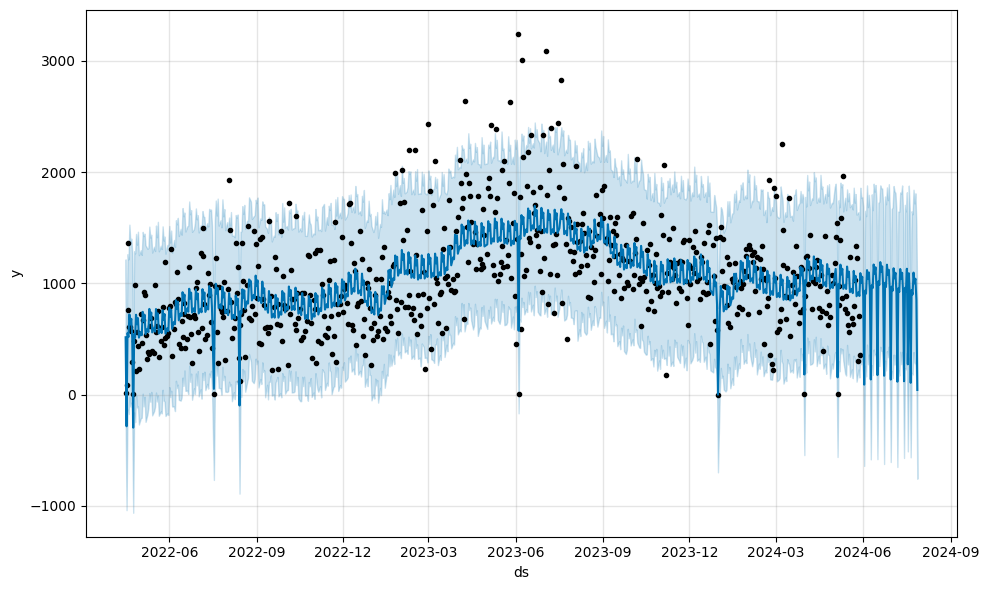

In [28]:
# Grafica las predicciones junto con el historial
fig1 = m.plot(forecast)

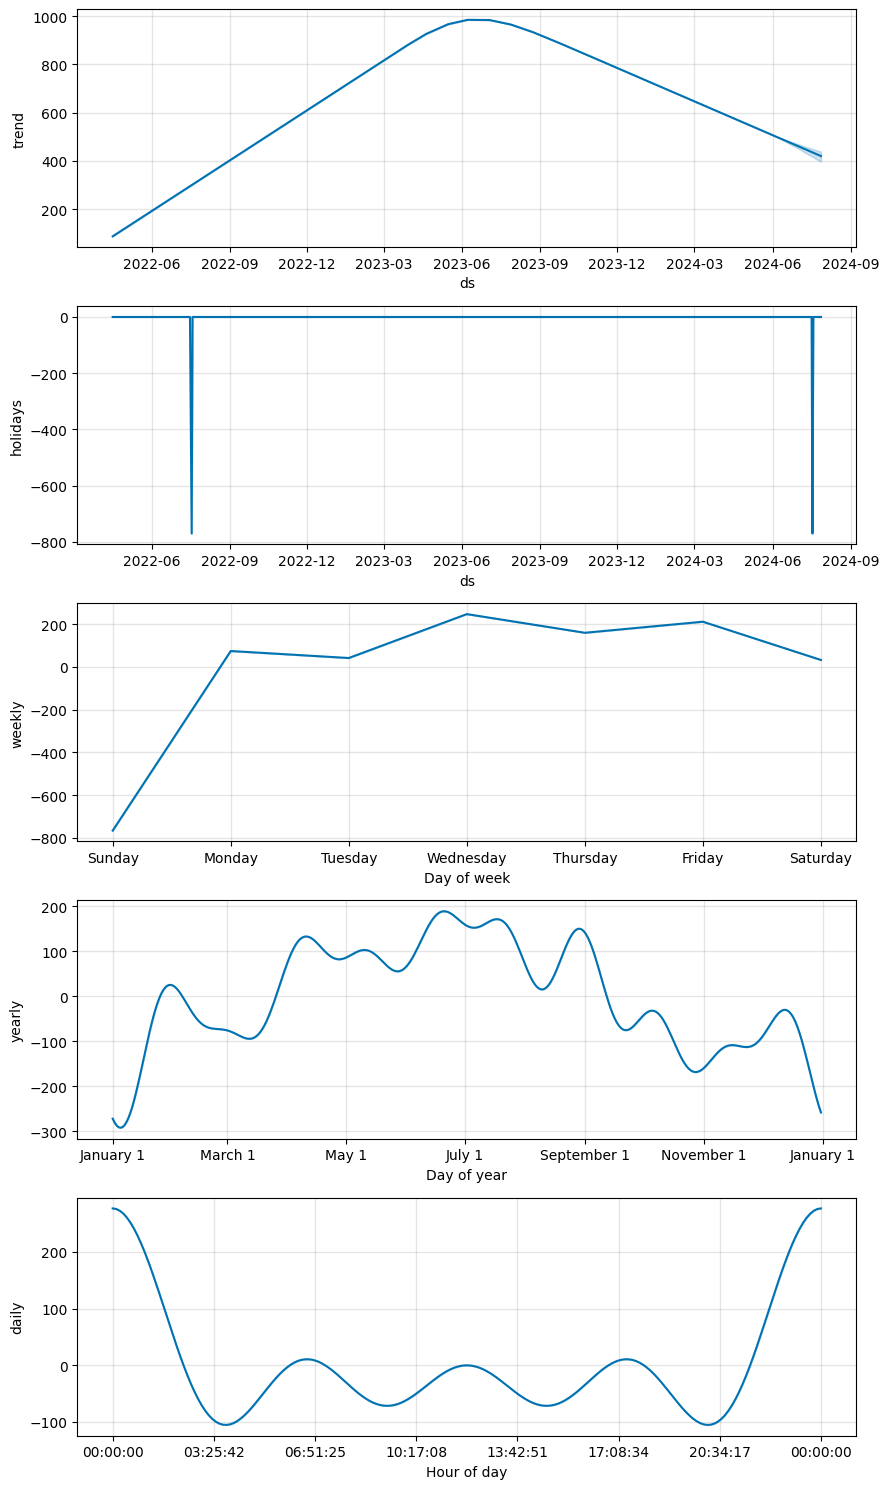

In [29]:
# Descompone y grafica los componentes de las predicciones (tendencia, estacionalidades, días festivos)
fig2 = m.plot_components(forecast)

In [30]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [31]:
plot_components_plotly(m, forecast)

#### Save model

In [32]:
from prophet.serialize import model_to_json, model_from_json

with open('prophet_model_top20_v1.json', 'w') as fout:
    fout.write(model_to_json(m))  # Save model

with open('prophet_model_top20_v1.json', 'r') as fin:
    m = model_from_json(fin.read())  # Load model

#### Metrics - MSE and RMSE

,actual,predicted
659,1336.0,1066.900414
660,1230.0,884.124690
661,298.0,920.709599
662,704.0,886.807607
663,355.0,1091.977472


Mean Squared Error (MSE): 142636.17189648873
Root Mean Squared Error (RMSE): 377.67204277850476


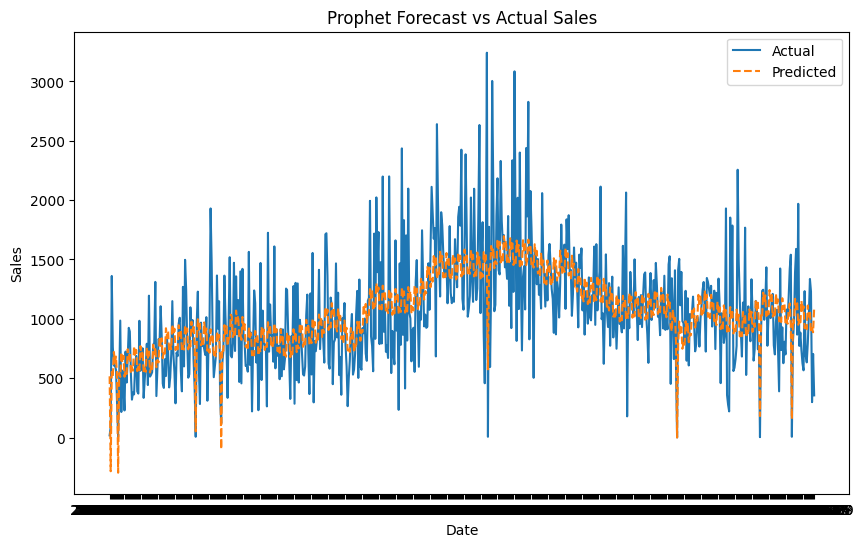

In [33]:
from sklearn.metrics import mean_squared_error
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt

# Extraer los valores reales y predichos para el cálculo del RMSE
y_true = df_prophet['y'].values  # Valores reales de ventas
y_pred = forecast['yhat'].iloc[:len(y_true)].values  # Predicciones del modelo Prophet

df_comparison = pd.DataFrame({
    'actual': y_true,
    'predicted': y_pred
})

# Si estás utilizando un entorno como Jupyter, puedes usar display para un mejor formato
from IPython.display import display
display(df_comparison.tail(5))

# Mostrar las métricas de error
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Graficar las predicciones vs los valores reales (opcional)
plt.figure(figsize=(10, 6))
plt.plot(df_prophet['ds'], y_true, label='Actual')
plt.plot(df_prophet['ds'], y_pred, label='Predicted', linestyle='--')
plt.title('Prophet Forecast vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

#### Backtesting

In [34]:
from prophet.diagnostics import cross_validation, performance_metrics

df_cv = cross_validation(m, initial='365 days', period='180 days', horizon='365 days')
df_p = performance_metrics(df_cv)

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/1 [00:00<?, ?it/s]01:40:16 - cmdstanpy - INFO - Chain [1] start processing
01:40:16 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  3.50it/s]


In [35]:
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,35 days,5.056462e+05,711.088024,555.566483,5.378296,0.226747,0.388190,0.709677
1,36 days,5.177815e+05,719.570324,561.068141,5.388348,0.226747,0.391882,0.709677
2,37 days,4.747402e+05,689.013909,531.599093,5.308926,0.219366,0.360116,0.741935
3,38 days,4.873098e+05,698.075797,545.138319,5.323140,0.226747,0.370049,0.741935
4,39 days,4.009556e+05,633.210535,514.432413,5.316911,0.226747,0.359164,0.741935
...,...,...,...,...,...,...,...,...
277,360 days,2.369491e+06,1539.315009,1480.445891,10.994253,1.940994,0.918164,0.064516
278,361 days,2.302807e+06,1517.500312,1457.178272,10.945128,1.860860,0.902594,0.064516
279,363 days,2.353081e+06,1533.975652,1469.481027,11.033324,1.860860,0.908088,0.064516
280,364 days,2.420706e+06,1555.861977,1493.707689,11.091372,1.940994,0.927016,0.064516


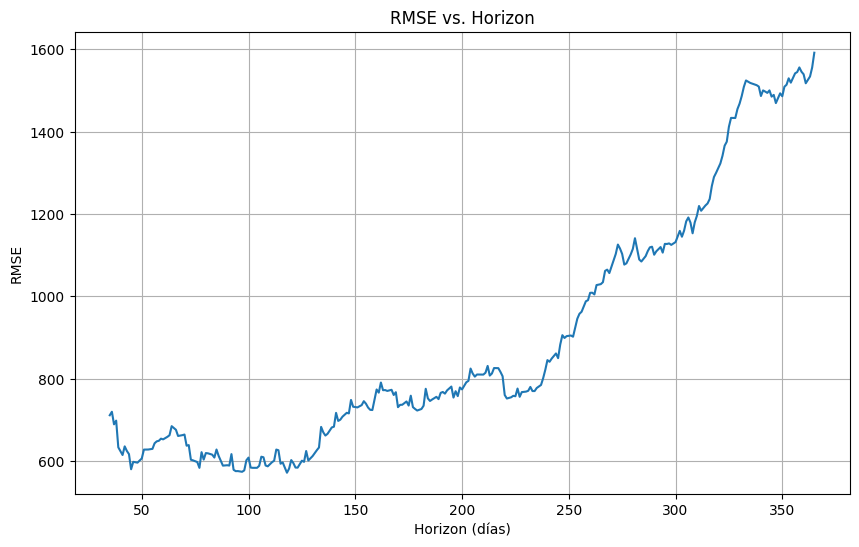

In [36]:
import matplotlib.pyplot as plt

# Asegurarte de que `horizon` esté en días (en caso de que esté en timedelta u otra unidad)
df_p['horizon'] = df_p['horizon'].dt.days  # Si 'horizon' está en formato timedelta

# Graficar el RMSE
plt.figure(figsize=(10, 6))
plt.plot(df_p['horizon'], df_p['rmse'])
plt.title('RMSE vs. Horizon')
plt.xlabel('Horizon (días)')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()